In [1]:
from utils import *
from terminal_models import FeedforwardUnicycle
from feedforward_network import FeedForwardNet
import torch
import matplotlib.pyplot as plt


In [2]:
net0 = torch.load('./nets/net0.pth')
net1 = torch.load('./nets/net1.pth')
net2 = torch.load('./nets/net2.pth')
net3 = torch.load('./nets/net3.pth')
net4 = torch.load('./nets/net4.pth')
net5 = torch.load('./nets/net5.pth')
net6 = torch.load('./nets/net6.pth')
net7 = torch.load('./nets/net7.pth')
net8 = torch.load('./nets/net8.pth')
net9 = torch.load('./nets/net9.pth')


In [19]:
#xtest = points(r=[2.,1.25, 0.5], n = [1, 0, 0])
xtest = np.array([-2., 2., 0]).reshape(1, 3)

In [30]:
# Get values for DATA 10:

mean_error = []

def valuesConvergence(net, dataset):
    """Generate Dataset using net9"""
    values = []
    for position in dataset:
        terminal = FeedforwardUnicycle(net)
        ddp = solve_problem(terminal_model=terminal, initial_configuration=position,precision=1e-9)
        values.append(ddp.cost)
    return np.array(values).reshape(-1, 1)

def error(net, yvalid, xtest):
    """Use the net to predict ytest and return error between ytest and yvalid """
    positions = torch.tensor(xtest, dtype = torch.float32)
    y_test = net(positions).detach().numpy().reshape(-1,1)
    
    return np.abs(np.mean(y_test - yvalid))

In [31]:
# Values generated by converging neural net
vals = valuesConvergence(net9, xtest)

In [32]:
neural_nets = [net0, net1, net2, net3, net4, net5, net6, net7, net8, net9]


In [33]:
for neural_net in neural_nets:
    mean_error.append(error(net=neural_net, yvalid = vals, xtest = xtest))
    
    

Text(0.5, 1.0, 'Mean Error Vs Iterations')

<Figure size 432x288 with 0 Axes>

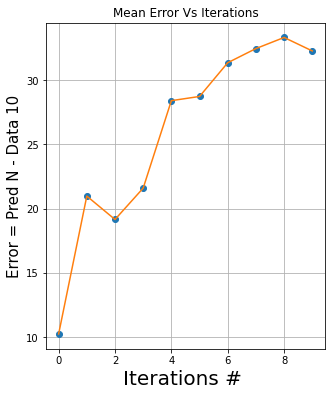

In [34]:
plt.clf()
fig, ax = plt.subplots(figsize=(5,6))
plt.plot(mean_error, "o",)
plt.plot(mean_error)
plt.xlabel("Iterations # ", fontsize = 20)
plt.ylabel("Error = Pred N - Data 10", fontsize = 15)

plt.grid()
plt.title("Mean Error Vs Iterations")